In [1]:
# Importing the libraries to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the Dataset (Batch)

insurance = pd.read_csv('insurance.csv')
print(insurance.shape)
insurance.head(5)


(1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# General info

print(insurance.info())
print()
print(insurance['region'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [4]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


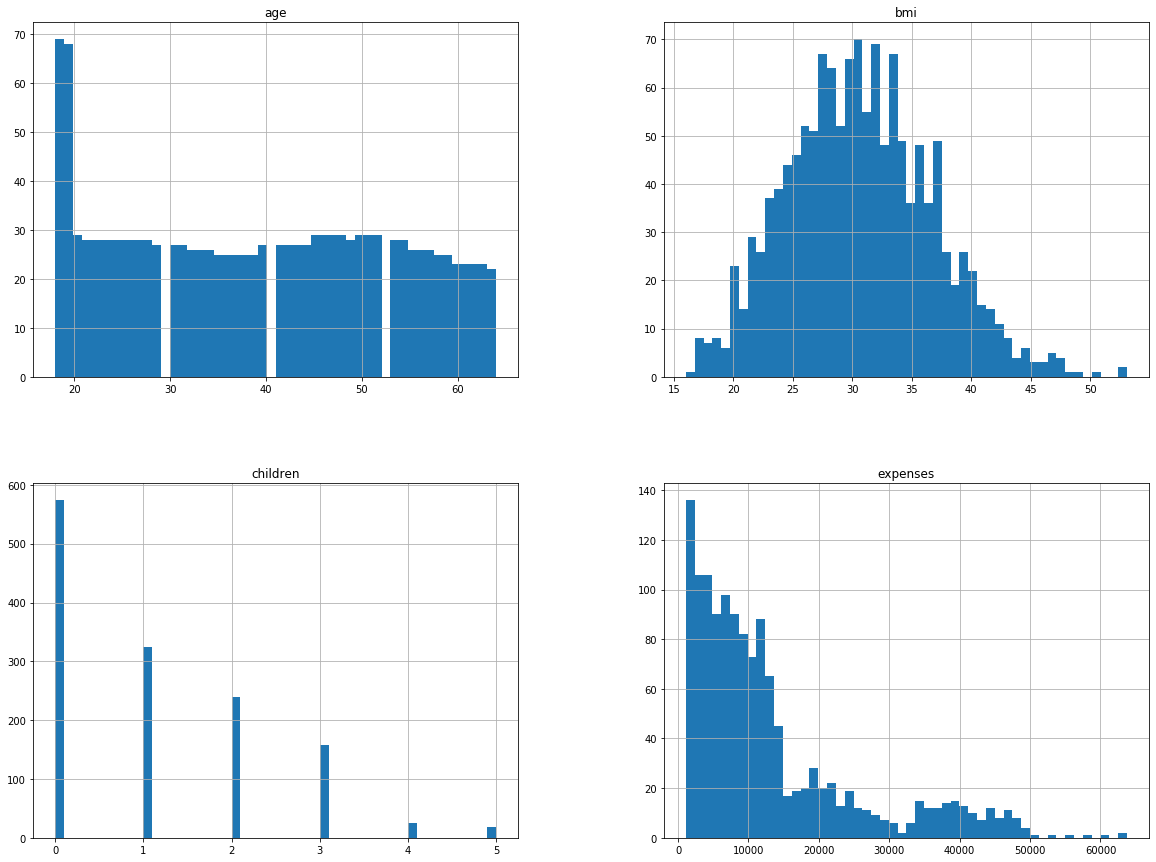

In [5]:
%matplotlib inline

insurance.hist(bins = 50, figsize = (20,15))
plt.show()

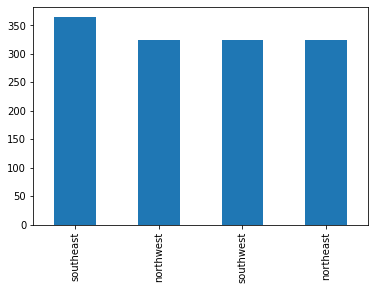

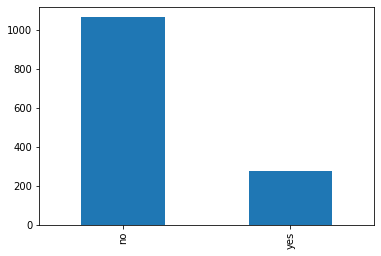

In [89]:
# Looking how the region parameter is distributed

insurance.region.value_counts().plot(kind="bar")
plt.show()

# Looking how the smoke paramter is distributed

insurance.smoker.value_counts().plot(kind='bar')
plt.show()

In [6]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance, test_size = 0.2, random_state = 42, stratify = insurance['age'])

print(train_set.shape)
print(test_set.shape)

(1070, 7)
(268, 7)


In [8]:
correlation_mat = train_set.corr()
correlation_mat

,age,bmi,children,expenses
age,1.000000,0.116634,0.046015,0.274163
bmi,0.116634,1.000000,0.021543,0.209712
children,0.046015,0.021543,1.000000,0.069946
expenses,0.274163,0.209712,0.069946,1.000000


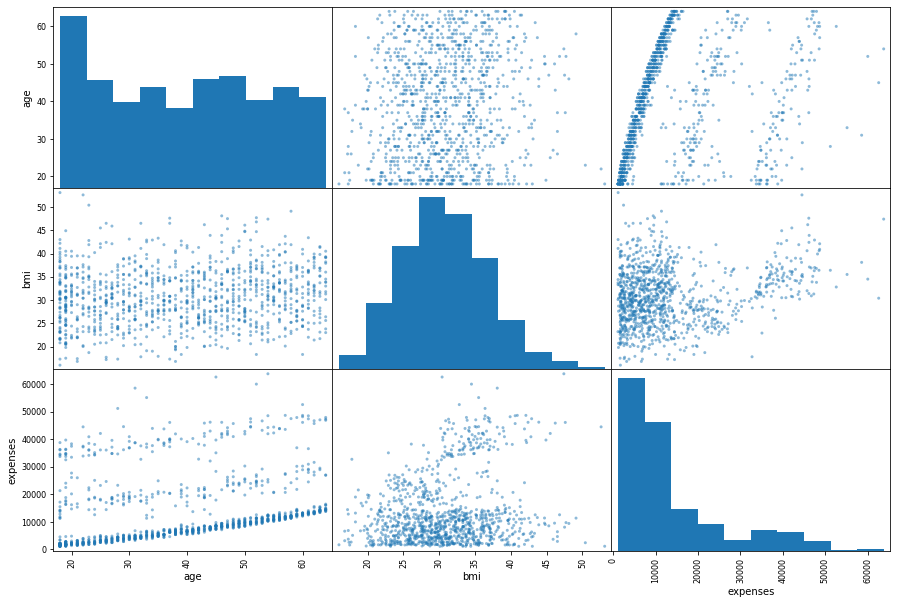

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["age", "bmi", "expenses"]
scatter_matrix(train_set[attributes], figsize=(15, 10))
plt.show()

In [ ]:
print("Summary Statistics of Medical Costs")
print(df['expenses'].describe())
print("skew:  {}".format(skew(df['expenses'])))
print("kurtosis:  {}".format(kurtosis(df['expenses'])))
print("missing charges values: {}".format(df['expenses'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

In [10]:
# Prepare data for machine learning

attributes_train = train_set.drop('expenses', axis = 1)
attributes_labels = train_set['expenses'].copy()

attributes_train[0:5]


,age,sex,bmi,children,smoker,region
1218,46,female,34.6,1,yes,southwest
669,40,female,29.8,1,no,southeast
618,19,female,33.1,0,yes,southeast
58,53,female,22.9,1,yes,southeast
902,26,male,27.3,3,no,northeast


In [11]:
cat_col=['smoker','region','sex']
print(cat_col)
num_col=[i for i in attributes_train.columns if i not in cat_col]
print(num_col)

['smoker', 'region', 'sex']
['age', 'bmi', 'children']


In [12]:
# one-hot encoding

one_hot = pd.get_dummies(attributes_train[cat_col])
data_onehot = pd.concat([attributes_train[num_col],one_hot],axis=1)
print(data_onehot.shape)
print()
data_onehot.head(10)

(1070, 11)



,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
1218,46,34.6,1,0,1,0,0,0,1,1,0
669,40,29.8,1,1,0,0,0,1,0,1,0
618,19,33.1,0,0,1,0,0,1,0,1,0
58,53,22.9,1,0,1,0,0,1,0,1,0
902,26,27.3,3,1,0,1,0,0,0,0,1
867,57,43.7,1,1,0,0,0,0,1,0,1
1075,32,29.6,1,1,0,0,0,1,0,1,0
272,41,37.1,2,1,0,0,1,0,0,0,1
881,23,27.4,1,1,0,0,1,0,0,0,1
785,35,27.7,3,1,0,0,0,0,1,1,0


In [13]:
# Scaling

from sklearn.preprocessing import MinMaxScaler  # Normalization (between 0 and 1)

scaler = MinMaxScaler()
scaler.fit(data_onehot)
data_scaled = scaler.transform(data_onehot)
data_scaled

array([[0.60869565, 0.50134771, 0.2       , ..., 1.        , 1.        ,
        0.        ],
       [0.47826087, 0.37196765, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.02173913, 0.46091644, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7826087 , 0.18867925, 0.6       , ..., 1.        , 1.        ,
        0.        ],
       [0.86956522, 0.42587601, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.82608696, 0.69811321, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [14]:
data_complete = pd.DataFrame(data_scaled, columns = ['age','bmi','children','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest','sex_female','sex_male'])
print(data_complete.shape)
data_complete.head(5)

(1070, 11)


,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0.608696,0.501348,0.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.478261,0.371968,0.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.021739,0.460916,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.760870,0.185984,0.2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.173913,0.304582,0.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_complete, attributes_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Looking at the metrics of our model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

insurance_pred = lin_reg.predict(data_complete)
lin_mse = mean_squared_error(attributes_labels, insurance_pred)
lin_rmse = np.sqrt(lin_mse)

mae = mean_absolute_error(attributes_labels, insurance_pred)
r2 = r2_score(attributes_labels, insurance_pred)

print('MAE:' + ' ' + str(mae))
print('RMSE:' + ' ' + str(lin_rmse))
print('R2:' + ' ' + str(r2))

MAE: 4104.6192182234845
RMSE: 5987.457759343248
R2: 0.7606886351697412


In [17]:
import statsmodels.api as sm

X = attributes_labels
Y = insurance_pred

results = sm.OLS(Y,sm.add_constant(X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     3395.
Date:                Sat, 09 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:51:05   Log-Likelihood:                -10678.
No. Observations:                1070   AIC:                         2.136e+04
Df Residuals:                    1068   BIC:                         2.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3200.9262    236.704     13.523      0.0

C:\Users\Luca\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


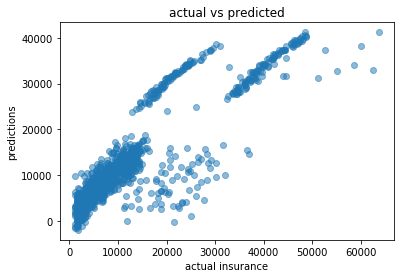

In [18]:
# Plotting actual versus predicted values (for linear regression)

import matplotlib.pyplot as plt

plt.scatter(attributes_labels, insurance_pred, alpha = 0.5)
plt.title('actual vs predicted')
plt.xlabel('actual insurance')
plt.ylabel('predictions')
plt.show()

In [19]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(data_complete, attributes_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
# Looking at the metrics of our model

dtree_pred = dtree_reg.predict(data_complete)
tree_mse = mean_squared_error(attributes_labels, dtree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

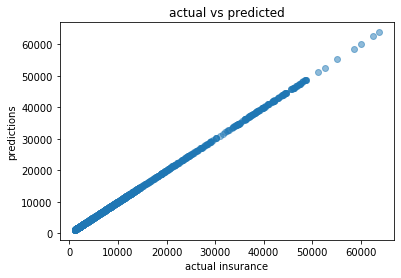

In [21]:
# Plotting actual versus predicted values (for decision tree regressor)

plt.scatter(attributes_labels, dtree_pred, alpha = 0.5)
plt.title('actual vs predicted')
plt.xlabel('actual insurance')
plt.ylabel('predictions')
plt.show()

In [22]:
# Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor

r_forest = RandomForestRegressor()
r_forest.fit(data_complete, attributes_labels)

C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [23]:
r_forest_pred = r_forest.predict(data_complete)
forest_mse = mean_squared_error(attributes_labels,r_forest_pred)
forest_mse = np.sqrt(forest_mse)
forest_mse

1874.3356252291894

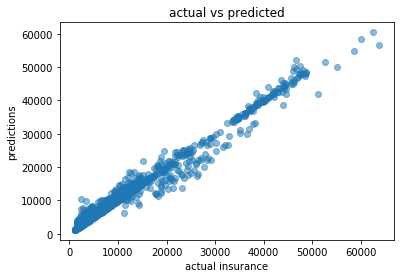

In [24]:
# Plotting actual versus predicted values (for renadom forest regressor)

plt.scatter(attributes_labels, r_forest_pred, alpha = 0.5)
plt.title('actual vs predicted')
plt.xlabel('actual insurance')
plt.ylabel('predictions')
plt.show()

In [25]:
# Using cross_validation to obtain more reliable results

from sklearn.model_selection import cross_val_score

# Cross Validation (Linear Reg Model)

lin_scores = cross_val_score(lin_reg, data_complete, attributes_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)

lin_reg_scores = np.sqrt(-lin_scores)
print(lin_reg_scores)
print()
print('Mean MSE:'+ ' ' + str(lin_reg_scores.mean()))
print()
print(' Std: ' + str(lin_reg_scores.std()))

[5625.51798924 5290.14304984 5957.63193664 6766.3907851  6263.074215
 5286.47509554 5580.37599495 6281.14489402 6767.41200568 6344.44258353]

Mean MSE: 6016.260854953788

 Std: 526.4649911484637


In [26]:
# Cross Validation (Decision Tree_Reg Model)

lin_scores = cross_val_score(dtree_reg, data_complete, attributes_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)

dtree_reg_scores = np.sqrt(-lin_scores)
print(dtree_reg_scores)
print()
print('Mean MSE:'+ ' ' + str(dtree_reg_scores.mean()))
print()
print(' Std: ' + str(dtree_reg_scores.std()))

[5219.48954893 6065.58705028 7444.23938054 6298.7599232  6633.74274683
 5987.49880145 4888.1478862  6195.96991833 7205.33370335 6428.42927984]

Mean MSE: 6236.719823895215

 Std: 744.379393882721


In [27]:
# Cross Validation (Random_Forest_Reg Model)

lin_scores = cross_val_score(r_forest, data_complete, attributes_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)

r_forest_reg_scores = np.sqrt(-lin_scores)
print(r_forest_reg_scores)
print()
print('Mean MSE:'+ ' ' + str(r_forest_reg_scores.mean()))
print()
print(' Std: ' + str(r_forest_reg_scores.std()))

[3985.52854142 4788.63041926 5693.00428902 4885.90525871 5490.2036279
 4696.82136235 4556.57785565 4204.81976365 5834.4882105  5622.94262433]

Mean MSE: 4975.892195278137

 Std: 616.9983718149924


In [28]:
# Tuning the best model (Using Grid or Random search)

from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(data_complete, attributes_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [29]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [30]:
data_grid = pd.DataFrame(grid_search.cv_results_)
data_grid.head(9)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033558,0.007828,0.007987,0.003571,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.329791e+07,-3.647072e+07,...,-3.438138e+07,2.305820e+06,17,-8.836795e+06,-8.235355e+06,-9.098051e+06,-1.111141e+07,-7.584087e+06,-8.973139e+06,1.189972e+06
1,0.061815,0.011967,0.008789,0.002990,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.240612e+07,-3.083370e+07,...,-2.651679e+07,4.412669e+06,10,-5.115969e+06,-4.529973e+06,-5.589996e+06,-4.936908e+06,-4.408291e+06,-4.916228e+06,4.246131e+05
2,0.152862,0.040569,0.007990,0.006685,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.213257e+07,-3.069794e+07,...,-2.597156e+07,5.217023e+06,9,-4.436884e+06,-3.889126e+06,-3.933313e+06,-3.890480e+06,-3.893683e+06,-4.008697e+06,2.147220e+05
3,0.021872,0.007657,0.003124,0.006249,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.099046e+07,-3.655780e+07,...,-3.155919e+07,2.735523e+06,14,-9.715729e+06,-7.831815e+06,-6.755968e+06,-9.317097e+06,-7.003208e+06,-8.124763e+06,1.197509e+06
4,0.073120,0.021702,0.003124,0.006248,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.214469e+07,-2.858647e+07,...,-2.490380e+07,3.964795e+06,6,-4.520802e+06,-4.069918e+06,-4.107341e+06,-4.675033e+06,-3.985159e+06,-4.271651e+06,2.737025e+05
5,0.235833,0.075031,0.014311,0.007396,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.843583e+07,-2.525508e+07,...,-2.271802e+07,4.278783e+06,2,-3.703044e+06,-3.084971e+06,-3.501280e+06,-3.603416e+06,-3.182329e+06,-3.415008e+06,2.404038e+05
6,0.019643,0.006057,0.006256,0.007662,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.321401e+07,-3.447397e+07,...,-2.775045e+07,4.625822e+06,11,-8.118629e+06,-5.642438e+06,-7.065142e+06,-7.833920e+06,-7.064030e+06,-7.144832e+06,8.594407e+05
7,0.081943,0.013590,0.010778,0.009168,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.755171e+07,-2.689473e+07,...,-2.285535e+07,4.704414e+06,3,-5.006142e+06,-3.514823e+06,-4.127947e+06,-4.596057e+06,-3.507461e+06,-4.150486e+06,5.913945e+05
8,0.177453,0.033005,0.013834,0.003498,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1.868888e+07,-2.554944e+07,...,-2.222992e+07,4.038719e+06,1,-3.307142e+06,-3.427724e+06,-3.184500e+06,-3.547753e+06,-3.106653e+06,-3.314754e+06,1.596125e+05


Tuning the parameters and using (param_max_feature = 6 and param_max_estimator = 30) we obtain a mean mse score on the train set of 3314 $

In [81]:
feature_importance = grid_search.best_estimator_.feature_importances_
features = pd.DataFrame({'Parameter': data_complete.columns, 'Coefficients': feature_importance})
features

,Parameter,Coefficients
0,age,0.132308
1,bmi,0.182107
2,children,0.019803
3,smoker_no,0.342342
4,smoker_yes,0.296670
5,region_northeast,0.005403
6,region_northwest,0.004969
7,region_southeast,0.004384
8,region_southwest,0.003350
9,sex_female,0.004900


In [33]:
# Preparing the Test_set

attributes_test = test_set.drop('expenses', axis = 1)
attributes_labels_test = test_set['expenses'].copy()

In [34]:
cat_col_test = ['smoker','region','sex']
print(cat_col_test)
num_col_test=[i for i in attributes_test.columns if i not in cat_col_test]
print(num_col_test)

['smoker', 'region', 'sex']
['age', 'bmi', 'children']


In [35]:
# one hot encoding
one_hot_test = pd.get_dummies(attributes_test[cat_col_test])
data_onehot_test = pd.concat([attributes_test[num_col_test],one_hot_test],axis=1)

In [36]:
# scaling

scaler.fit(data_onehot_test)
data_scaled_test = scaler.transform(data_onehot_test)

In [37]:
# Creating the test set dataframe
data_complete_test = pd.DataFrame(data_scaled_test, columns = ['age','bmi','children','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest','sex_female','sex_male'])
data_complete_test.head(5)

,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0.152174,0.419795,0.6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.195652,0.266212,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.978261,0.535836,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.434783,0.348123,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.630435,0.563140,0.6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [62]:
# Testing on the Test set

final_model = grid_search.best_estimator_

final_pred = final_model.predict(data_complete_test)
final_mse = mean_squared_error(attributes_labels_test, final_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

5311.999787802338

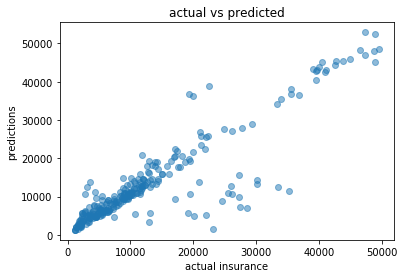

In [65]:
plt.scatter(attributes_labels_test, final_pred, alpha = 0.5)
plt.title('actual vs predicted')
plt.xlabel('actual insurance')
plt.ylabel('predictions')
plt.show()